In [27]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt

import shap

from utils import plot_pca

from sklearn.decomposition import PCA


In [28]:
df = pd.read_csv('../data/EDD_isoprenol_production.csv', index_col=0)
df.drop('Measurement Type', axis=1, inplace=True)

# Split the data into X and y
X = df.drop('Value', axis=1).copy()
y = df['Value'].copy()

df.head()

,Value,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL
Line Name,,,,,,,,,
Strain 1,0.000000,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
Strain 2,0.552101,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0
Strain 3,0.349196,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0
Strain 4,0.551849,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0
Strain 5,0.080117,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0


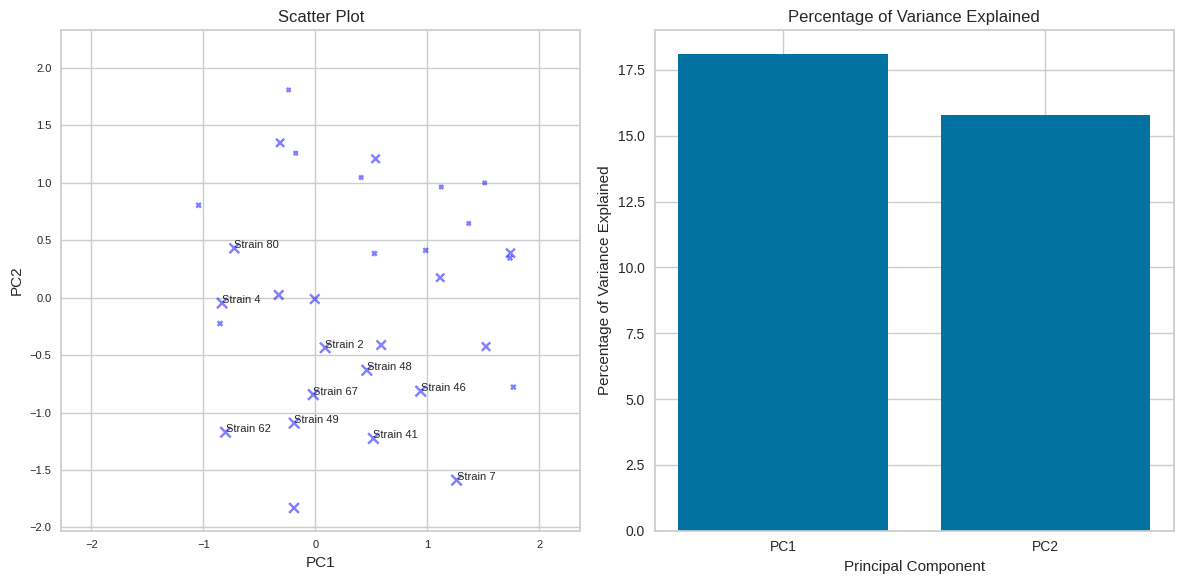

In [29]:
# Perfrom PCA on the data
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df.drop('Value', axis=1)), index=df.index, columns=['PC1', 'PC2'])
pca_df.index = df.index
pca_df['Value'] = df['Value']

# Plot the PCA
plot_pca(pca_df, pca)

0.02707950878537992
0.0075723423217128865


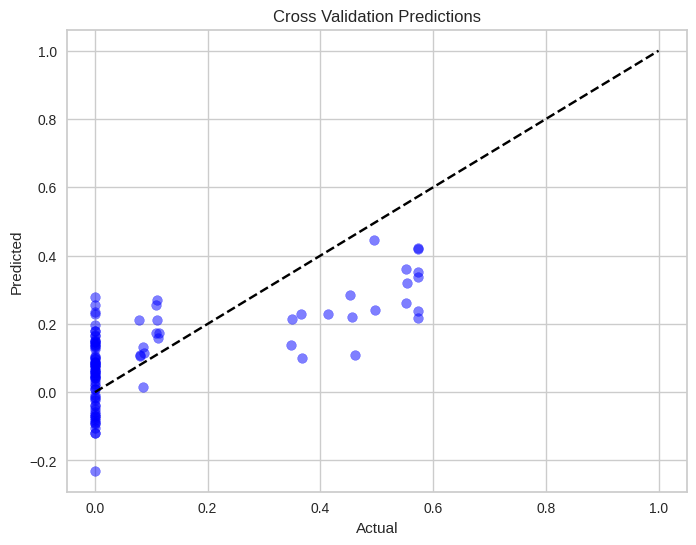

In [30]:
# Cross validate a Linear Regression model on the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=10)
print(np.abs(scores.mean()))
print(scores.std())
lr.fit(X, y)
# Real vs Predicted plot for SVR cross validation predictions
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y, lr.predict(X), color='blue', alpha=0.5)
# ax.scatter(y_test, y_pred, color='red', alpha=0.5)
# ax.set_xlim([-50, 200])
# ax.set_ylim([-100, 250])
# ax.plot([-50, 200], [-50, 200], color='black', linestyle='--')  # Plotting x=y line
ax.plot([0, 1], [0, 1], color='black', linestyle='--')
for i in range(len(y)):
    if y[i] > 70:
        ax.text(y[i], lr.predict(X)[i], X.index[i], fontsize=8)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Cross Validation Predictions')
plt.show()

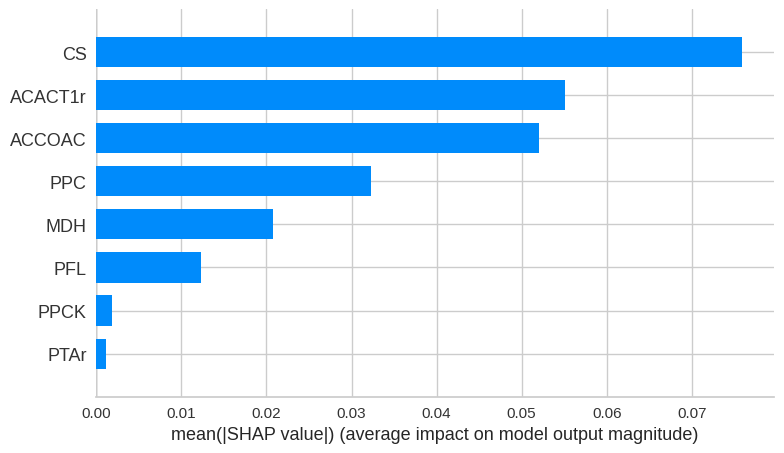

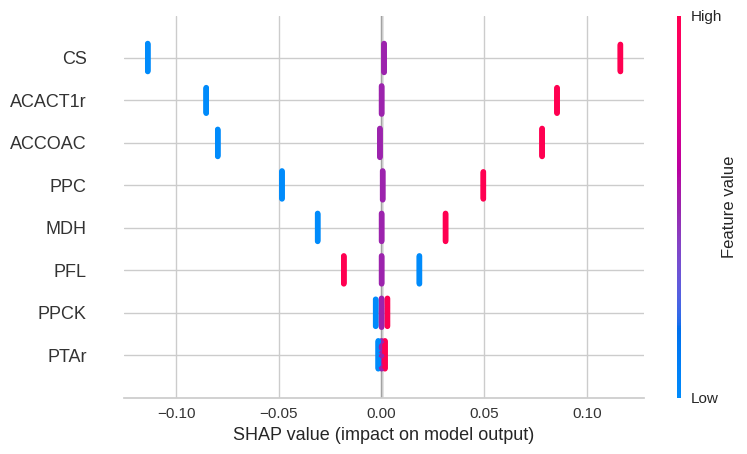

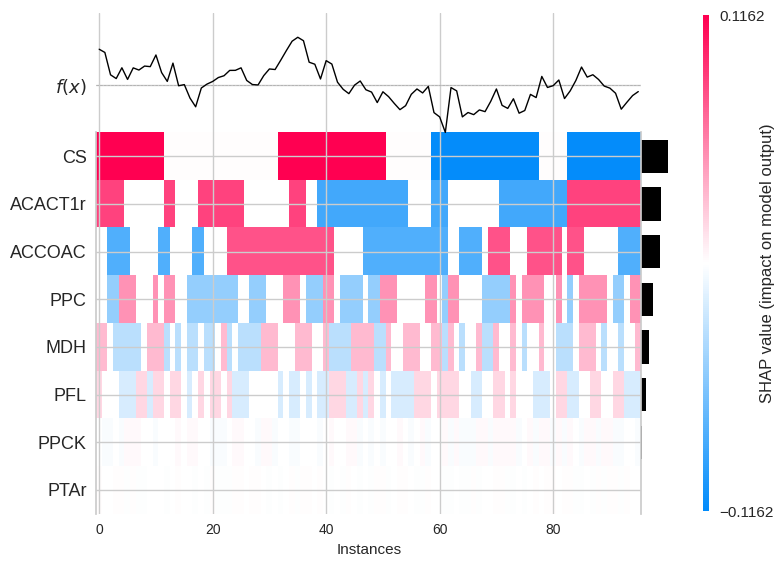

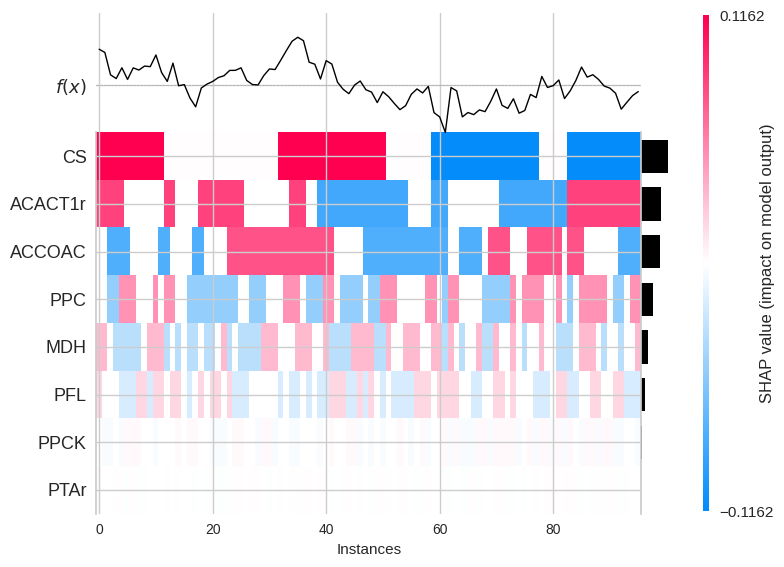

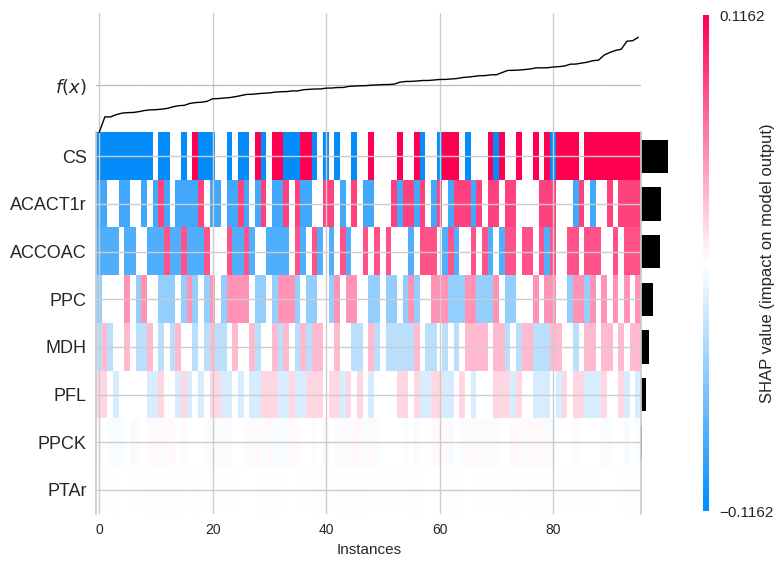

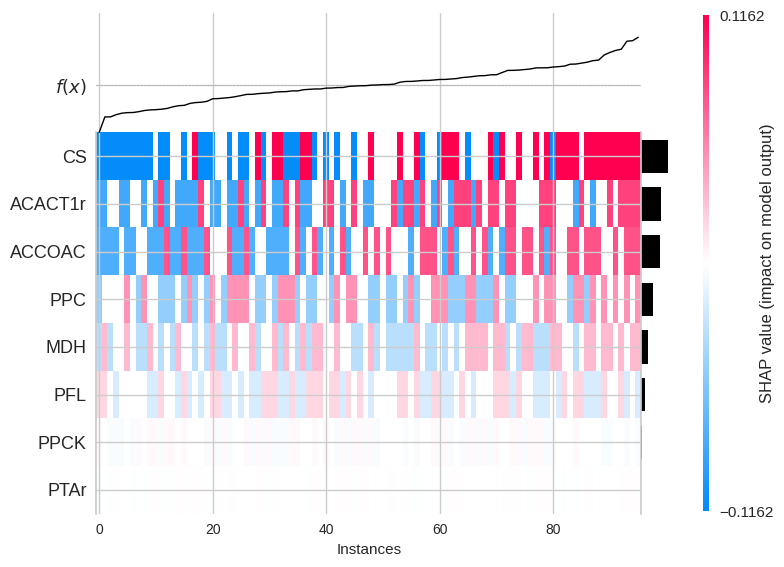

In [32]:
# Calculate SHAP values and plot
explainer = shap.Explainer(lr.predict, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, plot_type='bar')
shap.summary_plot(shap_values, X, plot_type='dot')
shap.plots.heatmap(shap_values)
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))
order = np.argsort(lr.predict(X))
shap.plots.heatmap(shap_values, instance_order=order)
shap.plots.heatmap(shap_values, instance_order=order, feature_values=shap_values.abs.max(0))